## Задание 1

Попробуйте получить доступ к https://gemini.google.com/ и https://huggingface.co/chat/ . Возможно вам понадобится создать там аккаунт и использовать vpn. Если у вас полилось, то приложите скришоноты запросов (в обе модели). Если вы постарались и у вас не получилось, то опишите, что вы попробовали и какая у вас была ошибка.

### Gemini

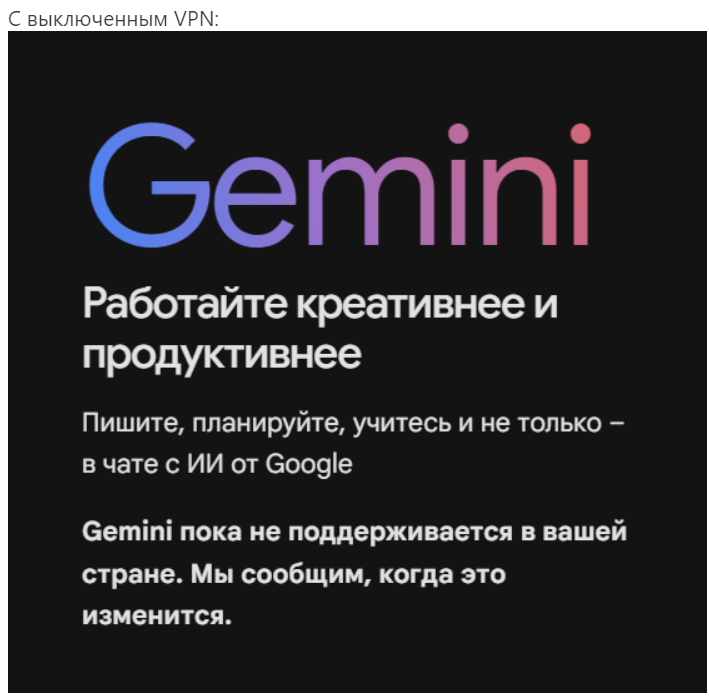

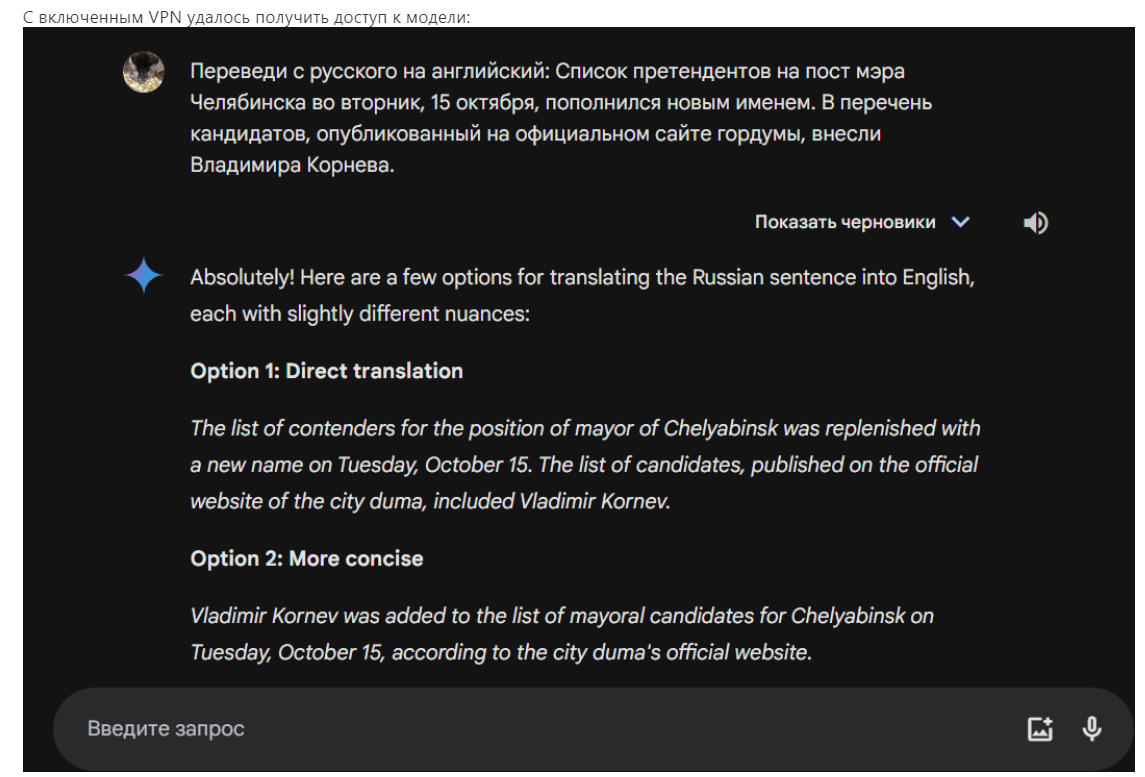

### HuggingFace

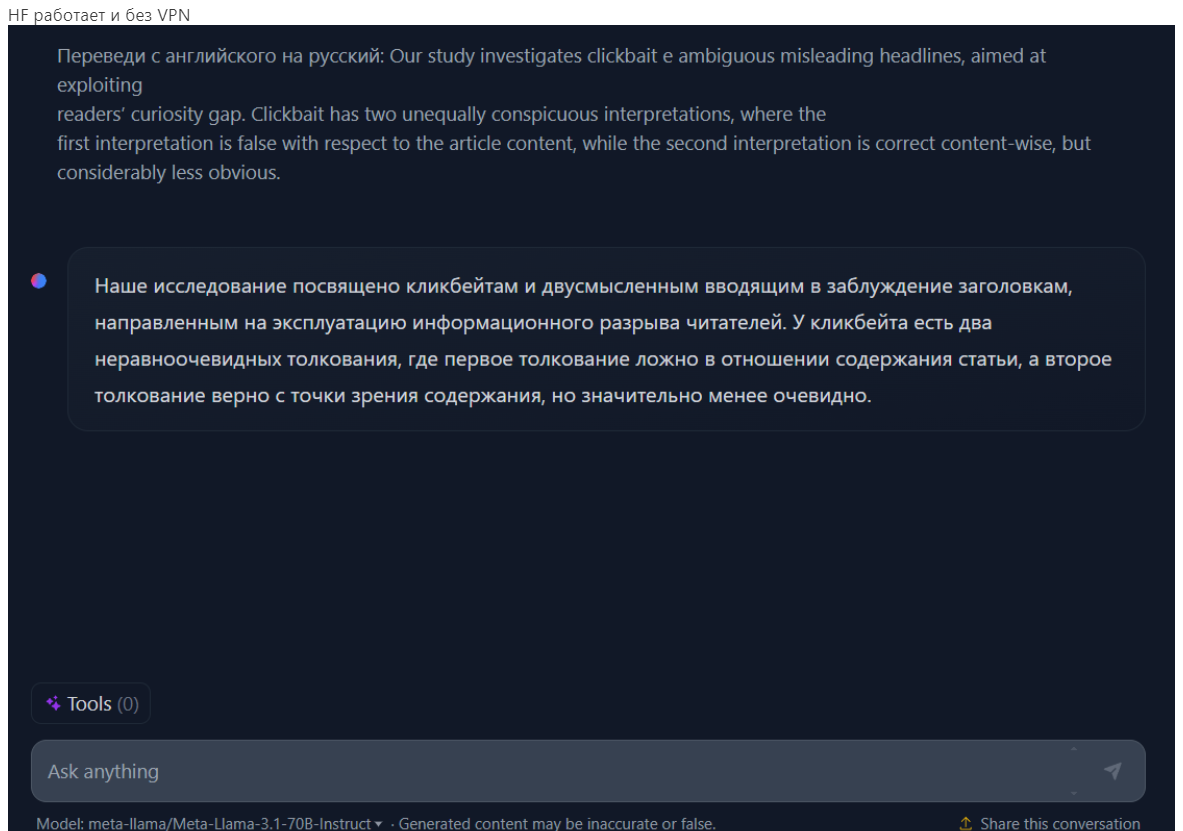

## Задание 2

Используя OpenAI API попробуйте сделать следующие вещи:

1) Попробуйте воспроизвести частеречную разметку с помощью gpt-4o-mini. Для данного предложения попробуйте получить точно такую же разметку.
   Если не работает, то попробуйте добавить примеров из opencorpora (не добавляя этот пример). Если у вас сработало это предложение, то попробуйте любое другое и оцените насколько промпт обобщает.  
   !Не размечайте большое количество предложений в датасете и не рассчитывайте метрики качества, оценивайте только вручную

In [ ]:
sentence = "Великолепная «Школа злословия» вернулась в эфир после летних каникул в новом формате."
sentence_pos = [['Великолепная', 'ADJF'],
 ['«', 'PNCT'],
 ['Школа', 'NOUN'],
 ['злословия', 'NOUN'],
 ['»', 'PNCT'],
 ['вернулась', 'VERB'],
 ['в', 'PREP'],
 ['эфир', 'NOUN'],
 ['после', 'PREP'],
 ['летних', 'ADJF'],
 ['каникул', 'NOUN'],
 ['в', 'PREP'],
 ['новом', 'ADJF'],
 ['формате', 'NOUN'],
 ['.', 'PNCT']]

2) попробуйте попросить модель написать решение к заданию из 3 домашки, где вам нужно было имплементировать алгоритм Леска. Если сразу не получается, то попробуйте улучшить промпт/добавить примеры использования нужных библиотек и т.п. Попробуйте получить рабочий код и проверить его на нескольких предложениях. Если код выдает ошибку, то попробуйте использовать API как чат (можете взять функцию dialog их семинара) и отправьте ошибку вторым сообщением (и так далее пока не сработает или вам не надоест)

3) проверьте насколько gpt-4o знакома с лингвистикой. Задайте как минимум 5 лингвистических вопросов и посмотрите, что получается. Желательно использовать очень специфичные и сложные вопросы.

### Не используйте ключ сверх меры. Не создавайте циклов, который посылают множество однообразных запросов, отправляйте каждый запрос вручную. Не используйте очень длинные промпты (больше 2000 токенов).

### 1 задание

In [ ]:
from openai import OpenAI
key = ''
client = OpenAI(api_key=key)

query = "Выполни частеречную разметку следующего предложения: Великолепная «Школа злословия» вернулась в эфир после летних каникул в новом формате."
messages = [{"role": "user", "content": query}]
response = client.chat.completions.create(
                       model="gpt-4o-mini",
                       messages = messages
        )


In [ ]:
print(response.choices[0].message.content)

В данном предложении можно выделить следующие части речи:

1. **Великолепная** - прилагательное
2. **«Школа** - существительное (именительный падеж, единственное число)
3. **злословия»** - существительное (родительный падеж, единственное число)
4. **вернулась** - глагол (прошедшее время, единственное число, женский род)
5. **в** - предлог
6. **эфир** - существительное (винительный падеж, единственное число)
7. **после** - предлог
8. **летних** - прилагательное (множественное число, родительный падеж)
9. **каникул** - существительное (родительный падеж, множественное число)
10. **в** - предлог
11. **новом** - прилагательное (единственное число, предложный падеж)
12. **формате** - существительное (предложный падеж, единственное число)

Таким образом, предложение разбивается на части речи следующим образом:  
Прилагательное, существительное, существительное, глагол, предлог, существительное, предлог, прилагательное, существительное, предлог, прилагательное, существительное.


In [ ]:
pos_example = [['Продлится', 'VERB'],
 ['она', 'NPRO'],
 ['55', 'NUMB'],
 ['дней', 'NOUN'],
 [',', 'PNCT'],
 ['вернулась', 'VERB'],
 ['до', 'PREP'],
 ['5', 'NUMB'],
 ['ноября', 'NOUN'],
 ['.', 'PNCT']]

In [ ]:
response.choices[0].message

ChatCompletionMessage(content='В данном предложении можно выделить следующие части речи:\n\n1. **Великолепная** - прилагательное\n2. **«Школа** - существительное (именительный падеж, единственное число)\n3. **злословия»** - существительное (родительный падеж, единственное число)\n4. **вернулась** - глагол (прошедшее время, единственное число, женский род)\n5. **в** - предлог\n6. **эфир** - существительное (винительный падеж, единственное число)\n7. **после** - предлог\n8. **летних** - прилагательное (множественное число, родительный падеж)\n9. **каникул** - существительное (родительный падеж, множественное число)\n10. **в** - предлог\n11. **новом** - прилагательное (единственное число, предложный падеж)\n12. **формате** - существительное (предложный падеж, единственное число)\n\nТаким образом, предложение разбивается на части речи следующим образом:  \nПрилагательное, существительное, существительное, глагол, предлог, существительное, предлог, прилагательное, существительное, предлог, 

In [ ]:
messages_2 = [{"role": "user", "content": query},
              response.choices[0].message,
              {"role": "user",
               "content": f"не совсем так, выполнили частеречную разметку данного раннее предложения как в этом примере: {pos_example}"}]

response_2 = client.chat.completions.create(
    model="gpt-4o-mini", # указываем модель
    messages=messages_2
)

In [ ]:
print(response_2.choices[0].message.content)

Понял, спасибо за уточнение. Вот частеречная разметка для вашего предложения в требуемом формате:

[['Великолепная', 'ADJ'], ['«Школа', 'NOUN'], ['злословия»', 'NOUN'], ['вернулась', 'VERB'], ['в', 'PREP'], ['эфир', 'NOUN'], ['после', 'PREP'], ['летних', 'ADJ'], ['каникул', 'NOUN'], ['в', 'PREP'], ['новом', 'ADJ'], ['формате', 'NOUN'], ['.', 'PNCT']]


In [ ]:
messages_3 = [{"role": "user", "content": query},
              response_2.choices[0].message,
              {"role": "user",
               "content": "Хорошо, но только отдели от слов 'школа' и 'злословия' символы « и » и включи их в разметку тоже"}]

response_3 = client.chat.completions.create(
    model="gpt-4o-mini", # указываем модель
    messages=messages_3
)

In [ ]:
print(response_3.choices[0].message.content)

Конечно, вот исправленная частеречная разметка с отдельным учетом символов « и »:

[['Великолепная', 'ADJ'], ['«', 'PNCT'], ['Школа', 'NOUN'], ['злословия', 'NOUN'], ['»', 'PNCT'], ['вернулась', 'VERB'], ['в', 'PREP'], ['эфир', 'NOUN'], ['после', 'PREP'], ['летних', 'ADJ'], ['каникул', 'NOUN'], ['в', 'PREP'], ['новом', 'ADJ'], ['формате', 'NOUN'], ['.', 'PNCT']]


In [ ]:
messages_4 = [{"role": "user", "content": query},
              response_3.choices[0].message,
              {"role": "user",
               "content": "Теперь разметь по такому же принципу это предложение: С одной стороны, в нашем кино нет традиции появления романтических комедий."}]

response_4 = client.chat.completions.create(
    model="gpt-4o-mini", # указываем модель
    messages=messages_4
)

In [ ]:
print(response_4.choices[0].message.content)

Вот частеречная разметка для вашего предложения:

[['С', 'PREP'], ['одной', 'NUM'], ['стороны', 'NOUN'], [',', 'PNCT'], ['в', 'PREP'], ['нашем', 'ADJ'], ['кино', 'NOUN'], ['нет', 'PART'], ['традиции', 'NOUN'], ['появления', 'NOUN'], ['романтических', 'ADJ'], ['комедий', 'NOUN'], ['.', 'PNCT']]


### 2 задание

In [ ]:
text = "Имплементируйте алгоритм Леска и оцените качество его работы на датасете `data/corpus_wsd_50k.txt` В качестве метрики близости вы должны попробовать два подхода: 1) Jaccard score на множествах слов (определений и контекста) 2) Cosine distance на эмбедингах sentence_transformers. В качестве метрики используйте accuracy (% правильных ответов). Предсказывайте только многозначные слова в датасете. Контекст вы можете определить самостоятельно (окно вокруг целевого слова или все предложение). Также можете поэкспериментировать с предобработкой для обоих методов"

In [ ]:
query = f"Напиши решение к заданию {text}"
messages = [{"role": "user", "content": query}]
response = client.chat.completions.create(
                       model="gpt-4o-mini",
                       messages = messages
        )

In [ ]:
print(response_2.choices[0].message.content)

Вы правы, список многозначных слов должен быть составлен на основе данных в корпусе. Давайте модифицируем предложенное решение, чтобы извлекать многозначные слова на основе синонимов (синсетов) из WordNet непосредственно из заданного корпуса `data/corpus_wsd_50k.txt`.

### Шаг 1: Составление списка многозначных слов из корпуса

Вместо предположения о наличии списка многозначных слов, мы можем пройтись по корпусу и собрать слова, у которых несколько синонимов в WordNet.

```python
import nltk
from nltk.corpus import wordnet as wn
from collections import defaultdict

# Загрузим данные
data = pd.read_csv('data/corpus_wsd_50k.txt', sep='\t', header=None, names=['word', 'context', 'correct_sense_id', 'definition'])

# Загружаем необходимые ресурсы из NLTK
nltk.download('wordnet')

# Составляем список многозначных слов
multiple_meaning_words = set()

# Словарь для подсчёта количества синонимов по каждому слову
synset_counts = defaultdict(int)

for word in data['word']:
    synsets = wn.synse

In [ ]:
def dialog():
    history = []
    while True:

        query = input("USER: ")
        history.append({"role": "user", "content": query})

        response = client.chat.completions.create(
                       model="gpt-4o-mini",
                       messages = history
        )
        print('ASSISTANT: ', response.choices[0].message.content)


        history.append(response.choices[0].message)

In [ ]:
dialog()

ASSISTANT:  The `AttributeError: 'float' object has no attribute 'lower'` error occurs when you are trying to call the `.lower()` method on a variable that is a float (a decimal number) instead of a string. In your case, it appears the variable `word` that you are passing to `wn.synsets(word)` is sometimes a float instead of a string.

Here’s how you can handle this situation:

1. **Check Data Type**: Before passing `word` to `wn.synsets()`, check if it's actually a string. If it’s not a string (like a float or `None`), you should handle it accordingly.

2. **Filtering**: You might want to filter out non-string entries in your loop.

Here’s an updated version of your code that includes checks for the data type:

```python
from collections import defaultdict
import nltk
from nltk.corpus import wordnet as wn

# Assuming `data` is your DataFrame
synset_counts = defaultdict(int)
multiple_meaning_words = set()

for word in data['word']:
    # Check if `word` is a string
    if isinstance(wo

KeyboardInterrupt: Interrupted by user

### 3 Задание

In [ ]:
query = "Ответь на следующие вопросы по лингвистике: 1) что такое дитранзитивная конструкция? 2) Что такое максимы грайса? 3) В чём отличие грамматики зависимостей от грамматики составляющих? 4) Кто такие младограмматики?5) Какие классы глаголов существуют в готском языке?"
messages = [{"role": "user", "content": query}]
response = client.chat.completions.create(
                       model="gpt-4o-mini",
                       messages = messages
        )

In [ ]:
print(response.choices[0].message.content)

Конечно, давайте по порядку:

1. **Дитранзитивная конструкция** — это конструкция, в которой глагол требует два вспомогательных дополнения: один объект (целевой) и второй объект (получатель). Например, в предложении «Я дал ему книгу» — «книгу» можно рассматривать как прямое дополнение, а «ему» — как косвенное. Дитранзитивные конструкции в языках часто используются для выражения действий, связанных с передачей или передачей объектов от одного участника (дарителя) к другому (получателю).

2. **Максимы Грайса** — это принципы коммуникации, предложенные британским философом Гербертом Грайсом в теории импликатуры. Существует четыре основные максимы: 
   - Максима количества: предоставлять столько информации, сколько необходимо, и не более.
   - Максима качества: стараться говорить правду и не предоставлять ложной информации.
   - Максима отношения: делать высказывания, которые релевантны контексту.
   - Максима способа: избегать неясности и неоднозначности, быть ясным и аккуратным в выражен

## Задание 3

Запустите `meta-llama/Llama-3.2-1B-Instruct` в колабе (заранее получив одобрение от меты и создав ключ в huggingface) также как я делал в семинаре. Попробуйте сделать следующие вещи:

1) Перевести предложение (любое, но желательно сложное для автоперевода) с английского на русский
2) возьмите небольшой текст с википедии (около 100 слов) и попросите модель саммаризовать его 1 предложением
3) попробуйте найти дату, которой ограничивается обучающая выборка - спросите несколько простых привязанных ко времени фактов (кто сейчас президент США, какое сейчас время года, что случилось в прошлом месяце). Спрашивайте на английском, если ответы совсем не имеет смысла.

In [1]:
!pip install transformers protobuf sentencepiece accelerate

In [3]:
import transformers, torch
from transformers import pipeline, AutoTokenizer, AutoModelForCausalLM
import warnings
warnings.filterwarnings('ignore')

In [4]:
HG_TOKEN = "TOKEN"

In [5]:
model_id = "meta-llama/Llama-3.2-1B-Instruct"

In [6]:
tokenizer = AutoTokenizer.from_pretrained(model_id, token=HG_TOKEN)

tokenizer_config.json:   0%|          | 0.00/54.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

In [7]:
if tokenizer.pad_token_id is None:
    tokenizer.pad_token_id = tokenizer.eos_token_id

In [8]:
model = AutoModelForCausalLM.from_pretrained(model_id, token=HG_TOKEN, torch_dtype=torch.bfloat16, device_map="auto")

config.json:   0%|          | 0.00/877 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.47G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

In [9]:
messages = [
    {"role": "user", "content": "Переведи на русский язык: In linguistics, sloppy identity is an interpretive property that is found with verb phrase ellipsis where the identity of the pronoun in an elided VP (verb phrase) is not identical to the antecedent VP."},
]

In [10]:
pipe = pipeline(task="text-generation", tokenizer=tokenizer, model=model)

In [11]:
output = pipe(messages, max_new_tokens=256, return_full_text=False)

In [12]:
output

[{'generated_text': 'В лингвистике скромная идентичность — это интерпретативное свойство, которое можно найти при вычитании предсказательного фразового периода, где идентичность фразы, вычитаемой в предсказательном фразовом периоде, не идентична предыдущему предсказательному фразовому периоду.'}]

In [14]:
text = "Фигурирующее в названии жанра сочетание «dance music» говорит о возможном использовании принципов музыкального построения и композиционной техники, применяемых при создании танцевальной музыки. Акцент же на слове «intelligent» указывает на то, что данный тип музыки обладает некими характеристиками, отличными от характеристик «обычной музыки». Такими характеристиками могут быть степень композиционной сложности, использование нетривиальных идей и ходов, использование необычных звуковых тембров, особое эмоциональное и информационное наполнение."

In [15]:
messages = [
    {"role": "user", "content": f"саммаризируй одним предложением: {text}"},
]

In [16]:
output = pipe(messages, max_new_tokens=256, return_full_text=False)

In [17]:
output

[{'generated_text': 'Фигурирующее в названии жанра «dance music» говорит о том, что данный тип музыки обладает некими характеристиками, отличными от характеристик «обычной музыки».'}]

In [18]:
def dialog(system_message=None):
    history = []
    if system_message is not None:
        history.append({"role": "system", "content": system_message})

    while True:

        query = input("USER: ")
        history.append({"role": "user", "content": query})
        outputs = pipe(
                        history,
                        do_sample=False,
                        return_full_text = False,
                        max_new_tokens=256
                    )
        output = outputs[0]['generated_text']



        print('ASSISTANT: ', output)
        history.append({'role': 'assistant', 'content': output})

In [19]:
dialog()


USER: Кто сейчас президент США?
ASSISTANT:  Сейчас президентом США является Джо Байден.
USER: Какой сейчас год?
ASSISTANT:  Сейчас год 2024.
USER: Какое сейчас время года?
ASSISTANT:  В США сейчас лето. В июле и июле-июле, а также в августе и сентябре, обычно проходит лето.
USER: А в России?
ASSISTANT:  В России сейчас лето. В июле и июле-июле, а также в августе и сентябре, обычно проходит лето.
USER: А что произошло в прошлом месяце?
ASSISTANT:  Я не могу предоставить информацию о событиях, произведенных в прошлом месяце. Чтобы получить информацию о событиях, произведенных в прошлом месяце, я recommend checking веб-сайты, которые предоставляют информацию о событиях, произведенных в России или США.
USER: ну ладно, а какой сейчас месяц?
ASSISTANT:  В США сейчас июль.
USER: Почему в США-то?
ASSISTANT:  В США сейчас июль, потому что это третий месяц года. В США иrogenный год, поэтому в июле и июле-июле, а также в августе и сентябре, обычно проходит лето.
USER: Сейчас октябрь
ASSISTANT:  В

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


ASSISTANT:  В остальном мире сейчас также июль. В июле и июле-июле, а также в августе и сентябре, обычно проходит лето.
USER: Так ты же сам сказал, что сейчас октябрь
ASSISTANT:  Я ошибался. В США сейчас октябрь, а в остальном мире - июль.
USER: Ну офигеть
ASSISTANT:  Нет worries! Я просто ошибался. В США сейчас октябрь, а в остальном мире - июль. Я учел, что я myself ошибся.


KeyboardInterrupt: Interrupted by user